In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
im2 = mpimg.imread('hitam20.jpg')

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

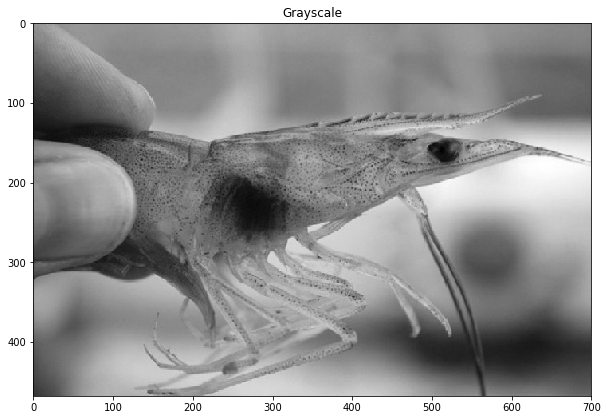

In [40]:
gray_im2 = rgb2gray(im2)
gray_im2 = gray_im2 * 255
plt.figure(figsize=(10,10)).add_subplot(111, title='Grayscale').imshow(gray_im2, 'gray')
plt.show()

In [35]:
def threshold(img, lo = 30, hi=130):
    strong = img > hi
    weak = img< lo
    return strong, weak


def search_threshold_value(img):
    count = 0
    for x in img:
        for y in x:
            count = count + y
    m,n = img.shape
    hi = count /(m*n)
    return hi,hi*0.2

29449.417465739705
5889.883493147941


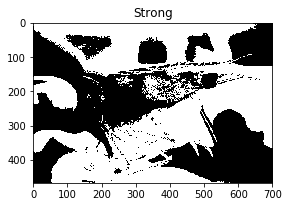

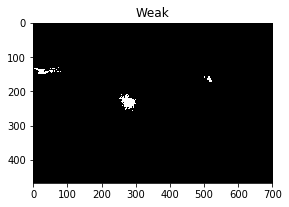

In [36]:
hi,lo = search_threshold_value(gray_im2)
print (hi)
print (lo)
s,w = threshold(gray_im2,lo,hi)
plt.figure(figsize=(10,10)).add_subplot(312, title='Strong').imshow(s,cmap='gray')
plt.figure(figsize=(10,10)).add_subplot(313, title='Weak').imshow(w,cmap='gray')

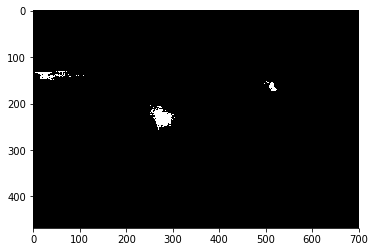

In [22]:

plt.figure(12)
plt.imshow(w,cmap = 'gray')
plt.show()

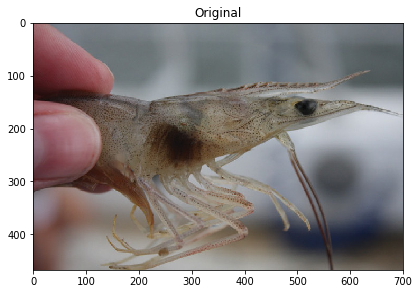

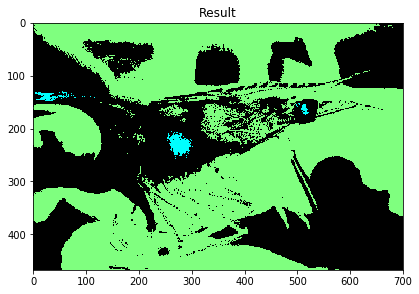

In [16]:
new_s = s / 2
new_w = w + new_s
    
m,n = gray_im2.shape


"""
s dan w adalah array binary (0 atau 1)
m dan n adalah ukuran gambar grayscale
"""
result = np.zeros((m,n,3))
result[:,:,0] = s
result[:,:,1] = (s + w) > 0
result[:,:,2] = w


plt.figure(figsize=(10,10)).add_subplot(211, title='Original').imshow(im2,cmap='gray')
plt.figure(figsize=(10,10)).add_subplot(212, title='Result').imshow(result,cmap='gray')

In [20]:
from PIL import Image

Image.fromarray(im2).convert("RGB").save("original.jpg")
Image.fromarray(w).convert("RGB").save("weak.jpg")
Image.fromarray(s).convert("RGB").save("strong.jpg")
Image.fromarray(result.astype('uint8')).convert("RGB").save("result.jpg")